# Project: Medical Appointment No Shows

This is my second real project related to my Udacity's nanodegree and its purpose is only to:
- wrangling the data
- make analysis based on my questions
- draw conclusions about my findings

I choose this problem because: 
- I live in Brazil and this motivate's me 
- This problem is on Kaggle so
  - I can get inspiration in other kernel's as I'm starting in this area
  - I can publish my first kernel
  - I'm publishing as a public kernel and that point already cover the step four of the project **"Share your findings"**


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../input/medicalappointmentnoshown/KaggleV2-May-2016.csv")
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [75]:
df.shape

(110527, 14)

First of all, we can notice that:
- I have 110k+ rows and 14 columns in this dataset (as explained on the challenge overview)
- I want to check if the patientId is duplicated since I don't know if the patient can schedule more appointments
- Depending on the analysis, maybe the **PatientId** and **AppointmentID** be useless for the analysis
- It's important to highlight that the **No-show** column value **Yes** means that the pacient didn't show at the appointment

Let's get more information about the dataset just to be sure that we have consistent data

In [76]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Right away we can draw some assumptions:
- most of the patients have about 37 yeas old with almost no scholarship (9%)
- in mean 
  - 19% of the patients have hipertension
  - 7% of the patients have diabetes
  - 3% of the patients suffers from alcoholism
  - 2% of the patients are handicapped

### Questions

The main questions I want to answer are:
- Based on the variables we have, what is the most relevant factor that is influencing the patient to no showing the medical appointment?
- There are any relation on these variables that can lead us to a more specific group of patients?
- The day of the week of the appointment influences the patient no showing?
- The waiting time of the patient between the schedule day and the appointment day influences it's no showing?
- There are patients no showing in appointments on the same day?

I'll analyse the **"No-Show"** as my dependent variable since to me it's the most important one and it's strongly related to what we want to discover here.

And I'll use all dataset variables in my analysis, I just want to check on the **Data wrangling** stage if we really need the:
- Patient id
- Appointment id
- Neighbourhood

Since it look's like this variables are not that important for this analysis.

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [77]:
# checking column information for missing values and strange types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [78]:
# checking for general data duplicates
df.duplicated().sum(), df.PatientId.duplicated().sum(), df.AppointmentID.duplicated().sum()

(0, 48228, 0)

In [79]:
# checking all possible values on some columns
print(df.Gender.unique())
print(sorted(df.Age.unique()))
print(sorted(df.Neighbourhood.unique()))
print(df.Scholarship.unique())
print(df.Hipertension.unique())
print(df.Diabetes.unique())
print(df.Alcoholism.unique())
print(df.Handcap.unique())
print(df.SMS_received.unique())
print(df['No-show'].unique())

['F' 'M']
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'J

It looks like we have a good dataset: 
- no missing lines 
- with the exception of **ScheduledDay**, **AppointmentDay** and **No-Show**, all other column types make's sense in the column context
- there are no weird values on most columns
- we discover that indeed we need the **Patient ID** since it seems some patients try to make new appointments
- **Appointment ID** seems to not be usefull for this analysis

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

I want to:
- remove useless columns
- rename the columns to use easier names during the exploration
- format all date columns to the correct type
- format the No-Show column with boolean type
- remove the weird age value that is less than zero
- add new columns
  - appointment_week_day: to show what day of the week the appointment was scheduled
  - appointment_waiting_time: waiting time to the appointment

In [80]:
# let's remove some useless columns
# I think the appointmentID is useless for this analysis and we can also remove the Neighbouhood since I can't asure that we're analysing one city or something else
df.drop(['AppointmentID', 'Neighbourhood'], axis=1, inplace=True)
df.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

In [81]:
# renaming all columns to simpler names for our exploration
df.rename(columns={'PatientId': 'patient_id', 'ScheduledDay': 'scheduled_day', 'AppointmentDay': 'appointment_day', 'SMS_received': 'received_sms', 'No-show': 'no_show' }, inplace=True)
df.rename(columns=lambda x: x.lower(), inplace=True)
df.columns

Index(['patient_id', 'gender', 'scheduled_day', 'appointment_day', 'age',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'received_sms', 'no_show'],
      dtype='object')

In [82]:
# formatting the date time 'scheduled_day' and 'appointment_day' columns
# i'm just testing different forms of time conversion here
df.scheduled_day = pd.to_datetime(df.scheduled_day)
df.appointment_day = df.appointment_day.apply(np.datetime64)

df.scheduled_day.head(1), df.appointment_day.head(1)

(0   2016-04-29 18:38:08
 Name: scheduled_day, dtype: datetime64[ns], 0   2016-04-29
 Name: appointment_day, dtype: datetime64[ns])

In [83]:
# formatting the 'no_show' column with boolean type
df.no_show = df.no_show.map({ 'No': False, 'Yes': True })

df.no_show.unique()

array([False,  True])

In [84]:
# filter all age to be greater than zero
df = df.query('age >= 0')
print(sorted(df.age.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [85]:
# creating the first column "appointment_week_day"
df['appointment_week_day'] = df.appointment_day.map(lambda day: day.day_name())
df.appointment_week_day.head()

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: appointment_week_day, dtype: object

In [86]:
# creating the second column "appointment_waiting_time"
# maybe I can improve that using only one loop to create a new series and then merge it with "df"
df["appointment_waiting_time"] = df.appointment_day - df.scheduled_day
df.appointment_waiting_time.head()

0   -1 days +05:21:52
1   -1 days +07:51:33
2   -1 days +07:40:56
3   -1 days +06:30:29
4   -1 days +07:52:37
Name: appointment_waiting_time, dtype: timedelta64[ns]

In [87]:
# well it seams that some are treated on the same day that they scheduled
# we can prevent that weird behaviour calculating the the "absolute value" of this column
df.appointment_waiting_time = df.appointment_waiting_time.abs()
df.appointment_waiting_time.head(10)

0   0 days 18:38:08
1   0 days 16:08:27
2   0 days 16:19:04
3   0 days 17:29:31
4   0 days 16:07:23
5   1 days 15:23:09
6   1 days 08:54:48
7   1 days 08:20:02
8   0 days 08:02:16
9   1 days 11:11:35
Name: appointment_waiting_time, dtype: timedelta64[ns]

In [88]:
# let's see how our data looks like after all cleanning
df.head(5)

,patient_id,gender,scheduled_day,appointment_day,age,scholarship,hipertension,diabetes,alcoholism,handcap,received_sms,no_show,appointment_week_day,appointment_waiting_time
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,False,Friday,18:38:08
1,5.589978e+14,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,False,Friday,16:08:27
2,4.262962e+12,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,False,Friday,16:19:04
3,8.679512e+11,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,False,Friday,17:29:31
4,8.841186e+12,F,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,0,False,Friday,16:07:23


It seams we have all the data we need to start exploring and answer the questions.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Based on the variables we have, what is the most relevant factor that is influencing the patient to no showing the medical appointment?

Here we want to check out if there is a relevant variable that we can use to compare with our **no_show** column

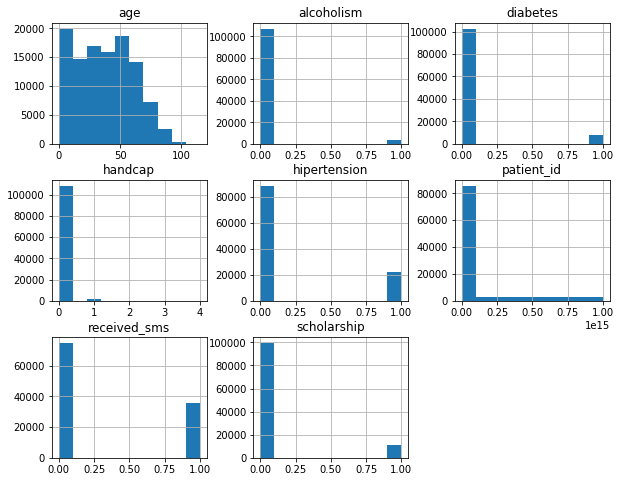

In [96]:
# let's see some basic histogram charts
# we must remove the 'no_show' column here to prevent the general histogram generator from crashing
df.loc[:, df.columns.difference(["no_show"])].hist(figsize=(10, 8));

- all data seams to be skewed to the left
- most of the patients 
  - are young
  - doesn't suffer from alcoholism/diabetes/hipertension
  - are not handcap
  - doesn't received a reminder sms
  - are in the "Bolsa familia" program
  
I think the age is the most relevant variable that we can analyse, since it's the only one that have a better distribution between the amount of patients.

But we have more variables to explore.

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])